In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
import optuna
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# 1. Load Data
X_train = pd.read_csv('cleveland_X_train_processed.csv')
X_test = pd.read_csv('cleveland_X_test_processed.csv')
y_train = pd.read_csv('cleveland_y_train_processed.csv').values.ravel()
y_test = pd.read_csv('cleveland_y_test_processed.csv').values.ravel()

In [ ]:
# 2. Run Optuna to find the best 'n_neighbors'
def objective(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # 10-Fold Cross-Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # n_jobs=-1 uses all CPU cores
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)

    return scores.mean()

In [ ]:
# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-12-04 06:07:09,936] A new study created in memory with name: no-name-d950cfe2-1f6f-4bda-9727-cc72c8964cfb
[I 2025-12-04 06:07:16,285] Trial 0 finished with value: 0.7452380952380954 and parameters: {'n_neighbors': 1}. Best is trial 0 with value: 0.7452380952380954.
[I 2025-12-04 06:07:16,449] Trial 1 finished with value: 0.7506493506493506 and parameters: {'n_neighbors': 31}. Best is trial 1 with value: 0.7506493506493506.
[I 2025-12-04 06:07:16,577] Trial 2 finished with value: 0.7647186147186147 and parameters: {'n_neighbors': 19}. Best is trial 2 with value: 0.7647186147186147.
[I 2025-12-04 06:07:16,749] Trial 3 finished with value: 0.7837662337662337 and parameters: {'n_neighbors': 14}. Best is trial 3 with value: 0.7837662337662337.
[I 2025-12-04 06:07:16,863] Trial 4 finished with value: 0.7647186147186147 and parameters: {'n_neighbors': 35}. Best is trial 3 with value: 0.7837662337662337.
[I 2025-12-04 06:07:17,055] Trial 5 finished with value: 0.7694805194805194 and pa

In [ ]:
best_k = study.best_params['n_neighbors']
print(f"Best K found: {best_k}")

Best K found: 7


In [ ]:
# 3. Retrain Model with the Best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# 4. Evaluate on Training Data
y_train_pred = best_knn.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

In [ ]:
# 5. Evaluate on Test Data
y_test_pred = best_knn.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [ ]:
# 6. Print Results
print("Training Set Metrics:")
print(f"  Accuracy:  {train_accuracy * 100:.2f}%")
print(f"  Precision: {train_precision * 100:.2f}%")
print(f"  Recall:    {train_recall * 100:.2f}%")
print(f"  F1-Score:  {train_f1 * 100:.2f}%")

print("Test Set Metrics:")
print(f"  Accuracy:  {test_accuracy * 100:.2f}%")
print(f"  Precision: {test_precision * 100:.2f}%")
print(f"  Recall:    {test_recall * 100:.2f}%")
print(f"  F1-Score:  {test_f1 * 100:.2f}%")

Training Set Metrics:
  Accuracy:  85.85%
  Precision: 86.67%
  Recall:    81.25%
  F1-Score:  83.87%
Test Set Metrics:
  Accuracy:  81.32%
  Precision: 82.50%
  Recall:    76.74%
  F1-Score:  79.52%


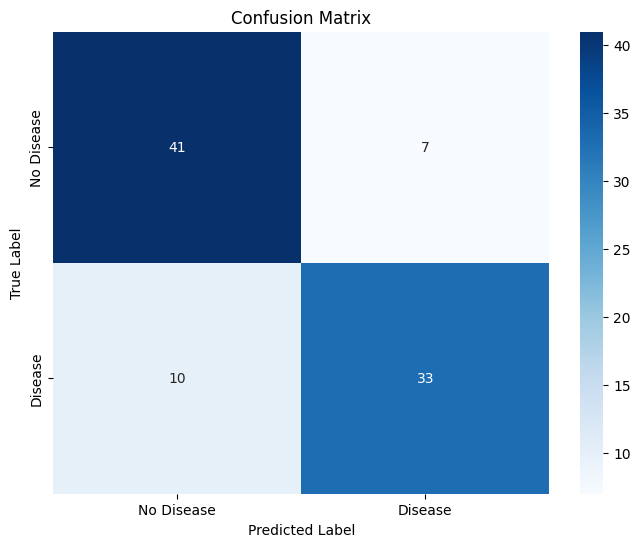

In [ ]:
# 1. Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# 2. Create the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Tuned K-Nearest Neighbour Model')

plt.show()